# Predicting Energy Consumption
## Intermediate Report
### Machine Learning 2021/2022
#### Mariana Nunes, 0591443

## 1. Introduction

The aim of this project is to **build a good regression model that predicts the energy consumption in a household**. For this, different models will be trained, descripted and analyzed, and based on their performance evaluation, the one that best suits this problem will be selected.<br>  
In this intermidiate report, a **Linear Regression** model will be trained. For the final report,  Decision Trees and Neural Network models will be presented as well. 
The strategy to follow will be:

1. Problem and data analysis
2. Data processing and features extraction
3. Data splitting in 3 sets: training, validation and test
4. Training and tuning the linear regression model
5. Analysis of model performance and error
6. Repeat step 4 to get a better performance

The different packages and libraries that will be used in this project are: numpy, pandas, scikit-learn, matplotlib and seaborn.

In [30]:
# import the libraries and packages
import numpy as np # numerical library
import pandas as pd # data manipulation library
import sklearn # scikit-learn machine learning library
import matplotlib.pyplot as plt # plotting
%matplotlib notebook 
import seaborn as sb # seaborn for plotting and styling
import sys
import os 
import glob
import time

## 2. Handle Data
### 2.1 Problem & Data Analysis/Visualization
We want to train a model to predict the energy consumption in a household (in Wh), named in the data sets as **Appliances**. The predictions are going to be based on different data sources and environmental parameters. The features available in the datas sets are descripted in the table below:

| Feature || Description || Unit |
| :- || :- || :- |
| date time stamp. || year-month-day || hour-minute-second |
| lights || energy use of light fixtures in the house || Wh |
| T1 || Temperature in kitchen area || Celsius |
| RH_1 || Humidity in kitchen area || % |
| T2 || Temperature in living room area || Celsius |
| RH_2 || Humidity in living room area || % |
| T3 || Temperature in laundry room area || Celsius |
| RH_3 || Humidity in laundry room area || % |
| T4 || Temperature in office room || Celsius |
| RH_4 || Humidity in office room || % |
| T5 || Temperature in bathroom || Celsius |
| RH_5 || Humidity in bathroom || % |
| T6 || Temperature outside the building (north side) || Celsius |
| RH_6 || Humidity outside the building (north side) || % |
| T7 || Temperature in ironing room || Celsius |
| RH_7 || Humidity in ironing room || % |
| T8 || Temperature in teenager room 2 || Celsius |
| RH_8 || Humidity in teenager room 2 || % |
| T9 || Temperature in parents room || Celsius |
| RH_9 || Humidity in parents room || % |
| To || Temperature outside (from weather station) || Celsius |
| Pressure || Pressure outside (from weather station) || mm Hg |
| RH_out || Humidity outside (from weather station) || % |
| Wind speed || Wind speed (from weather station) || m/s |
| Visibility || Visibility (from weather station) || km |
| Tdewpoint || Dew point (from weather station) || Celcius |
| rv1 || random variable || nondimensional |
| rv2 || random variable || nondimensional |



Two different data sets were initially given: one labeled set, the "train_data", that will be used to train the model, and one unlabeled set, the "test_data", that will be used to evaluate the final model in Kaggle. Let's start by import the given data sets:

In [31]:
#import data sets
train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")

#extract out the values for the features and label and save them as arrays
X = train_data.iloc[:,:-1].values
y = train_data['Appliances'].values

#get number of instances and features
num_inst = X.shape[0] 
num_feat = X.shape[1] 
print('number of features:', num_feat)
print('number of training instances:', num_inst)

number of features: 28
number of training instances: 15000


Now, let's **vizualize the data**  to understand what type of problem this is and to identify what preprocessing actions can be taken to optimize the model training: <br>
(note: the tables and figures captions can be found in comments)

In [3]:
#Table 1: features values of the first 5 instances in the train set
train_data.head()


,date,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
0,2016-01-11 17:00:00,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,60
1,2016-01-11 17:10:00,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,60
2,2016-01-11 17:20:00,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,50
3,2016-01-11 17:30:00,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,50
4,2016-01-11 17:40:00,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,60


<IPython.core.display.Javascript object>


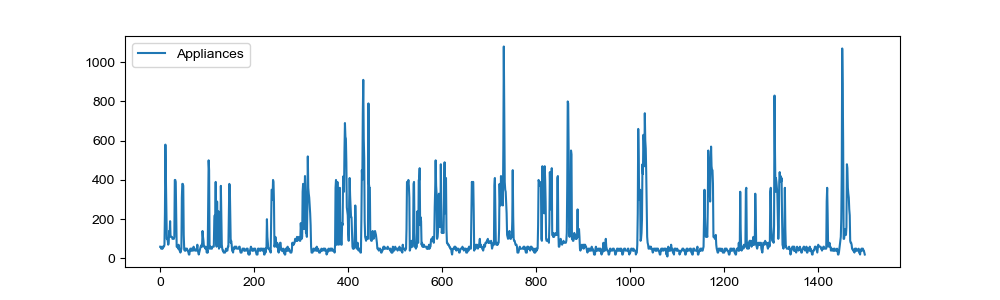

<AxesSubplot:>

In [4]:
#Fig 1: Appliances of the first 1500 datapoints in the training set
train_data[0:1500].plot( y="Appliances",figsize=(10,3))

<IPython.core.display.Javascript object>


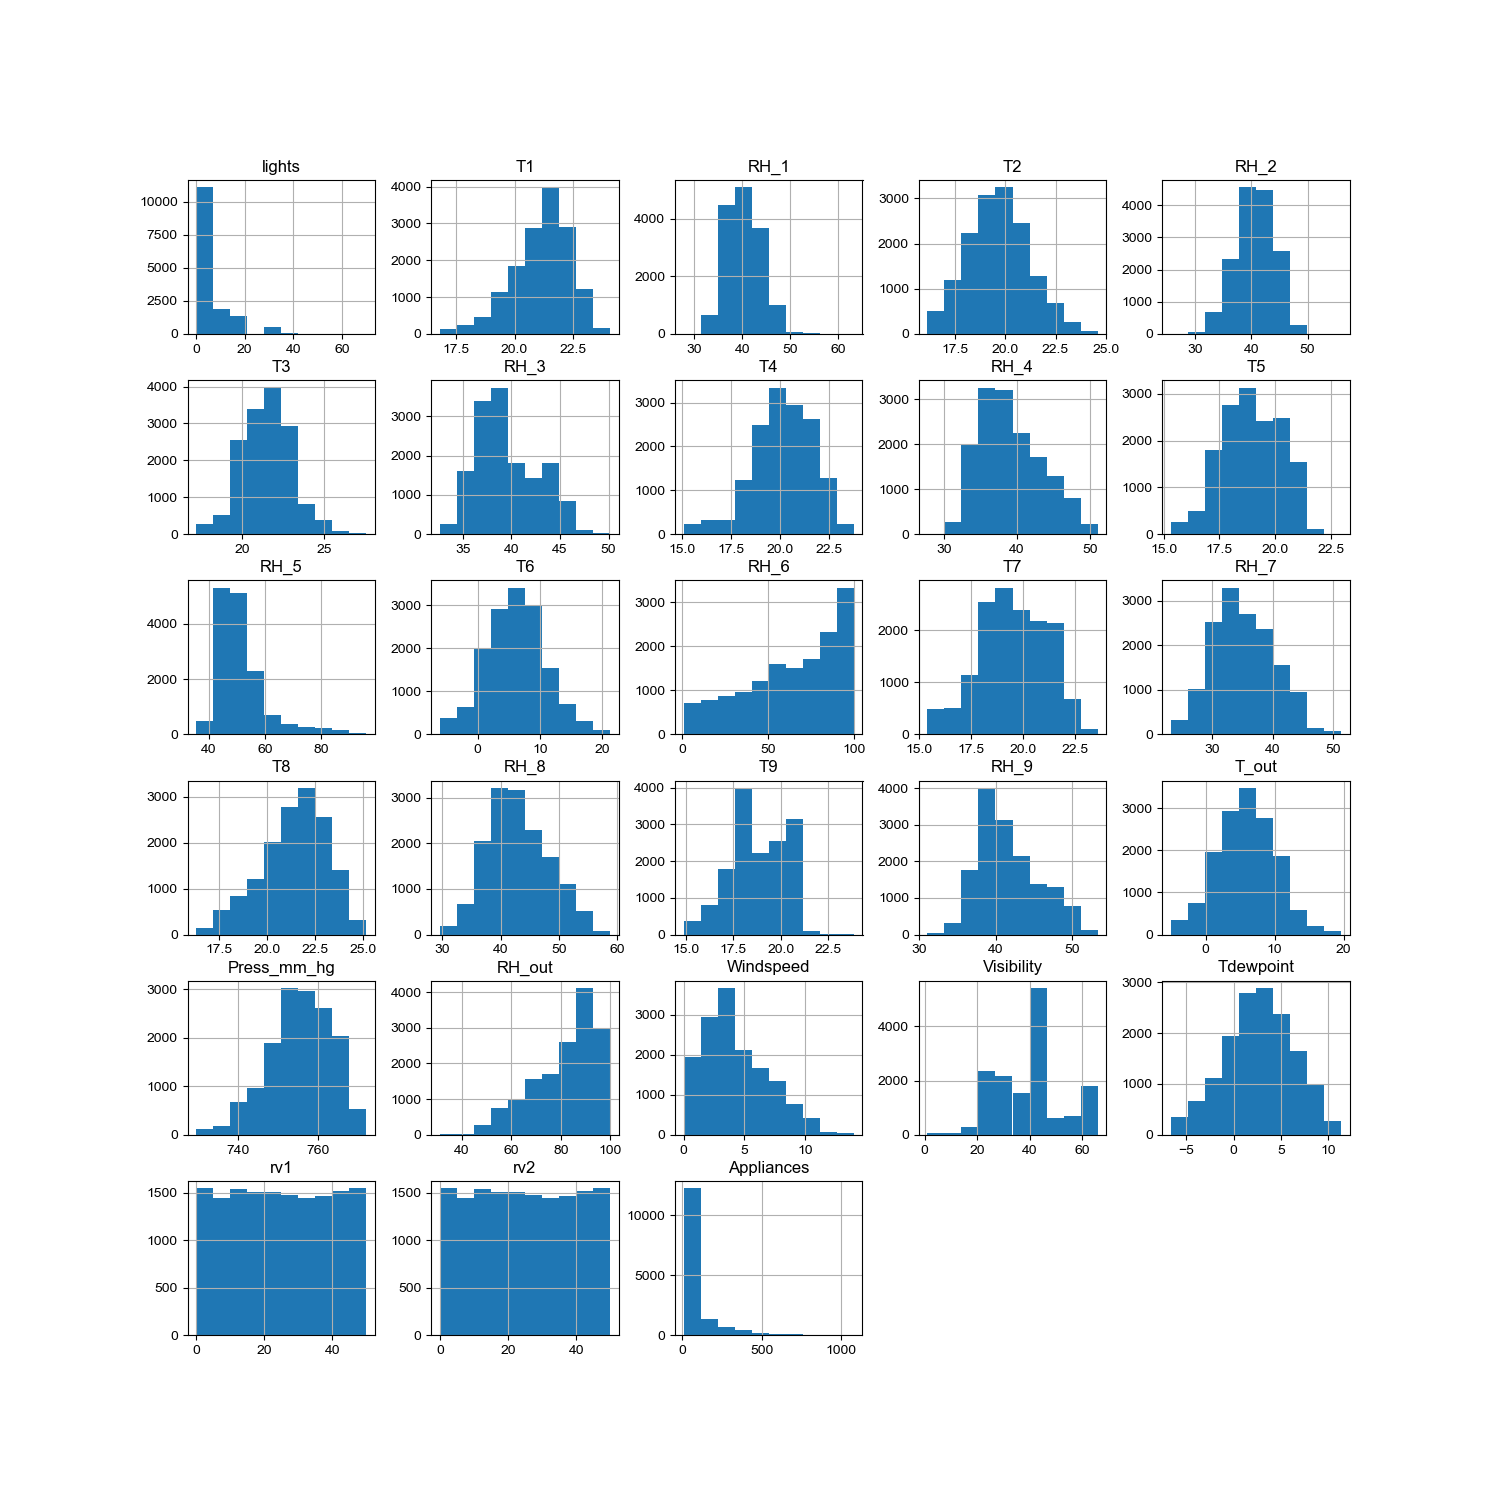

In [5]:
#Fig.2: distribution of the features&target values
train_data.hist(figsize = (15,15))
plt.show()

<IPython.core.display.Javascript object>


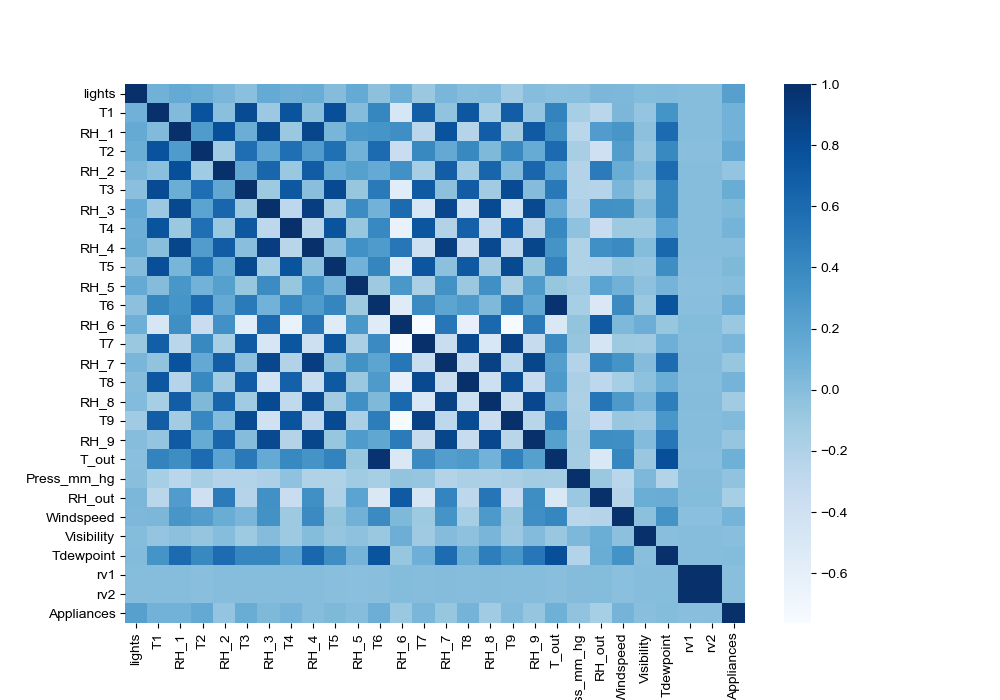

<AxesSubplot:>

In [6]:
#Fig.3: correlation matrix - relations between features and between each feature and target 
plt.figure(figsize=(10,7)) 
sb.heatmap(train_data.corr(),  #determine correlation between features
             cmap='Blues') #nice colos

<IPython.core.display.Javascript object>


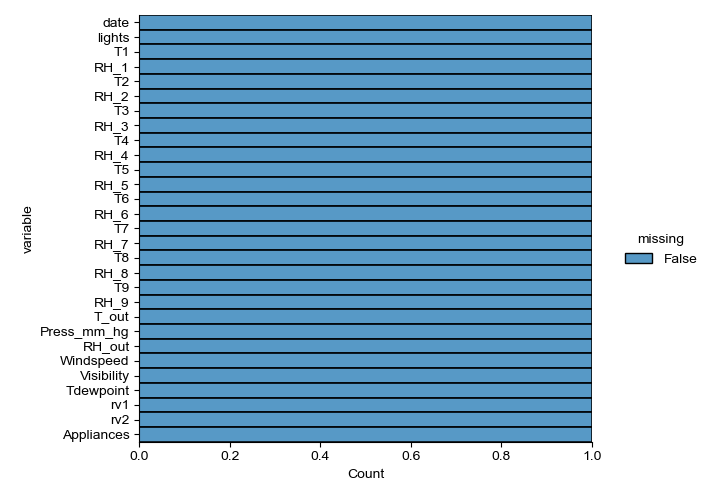

In [7]:
#Fig.4: Proportion of missing data for each feature and target in the data

#isna() is a boolean Pandas function. The output is True for missing data and False for the NOT missing data
#blue is false, orange is true
sb.displot(
    data=train_data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In table 1, we see the features have different scales, so **features normalization** will be needed. In this table we can also see that we have a time-based data, so we have to be careful while training the model and **don't make a random slipt of the data set** and we will have to **create a feature from this time variable**. <br>

From figure 1, we can observe the target values are very large, which makes this is a **regression problem**. <br>

In figure 2, we can see there are some **outliners values** that can be remove. <br>

Figure 3 shows the correlations between features and between each feature and the target value. We can cleary see in the figure that some attributes are strongly  correlated or anticorrelated (correlation=1 or =-1), which means they contain the same information. Consequently, we will need to perform **feature selection**, because all the features won't be needed to train the model.<br>

Notice that rv1 and rv2 not only have a correlation=1 but also have the same values distribution (according to figure 2), which means they probably are **repeted attributes** in the data set, and one can be deleted.<br>

In the last row/column of figure 3, we see there is no high correlation between the features and target, so a **linear relationship** may not exist between them.

Figure 4 shows us that there is **no missing data**.


### 2.2 Data Preprocessing & Feature Selection

#### 2.2.1 Creating a new feature from the time variable 


In [32]:
import datetime
df= pd.read_csv("./train.csv")
df.pop('Appliances')

df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%Y-%m-%d %H:%M:%S')
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df['hour'] = pd.DatetimeIndex(df['date']).hour
df['minutes'] = pd.DatetimeIndex(df['date']).minute
df['weekday'] = pd.DatetimeIndex(df['date']).weekday

df.pop('date')
num_feat = df.shape[1] #update number of features

X = df.values


#### 2.2.2 Outliers 
Outliers are unexpected values, usualy caused by mesurement erros or noise, that can have a negative impact in the model performance.

In [33]:
#identifying outliers using a 99% percentile-based approach
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

for n in range(num_feat):
    feat_n_values= X[:,n] 
    feat_n_mean, feat_n_std = mean(feat_n_values), std(feat_n_values)
    lower, upper= feat_n_mean - feat_n_std * 3, feat_n_mean + feat_n_std * 3
    # identify outliers
    outliers_count = 0
    for i in range(feat_n_values.size):
        if feat_n_values[i] < lower or feat_n_values[i] > upper:
            outliers_count += 1
    print(outliers_count,'Identified outliers in feature', n+1)

600 Identified outliers in feature 1
110 Identified outliers in feature 2
59 Identified outliers in feature 3
20 Identified outliers in feature 4
41 Identified outliers in feature 5
65 Identified outliers in feature 6
10 Identified outliers in feature 7
120 Identified outliers in feature 8
0 Identified outliers in feature 9
2 Identified outliers in feature 10
428 Identified outliers in feature 11
17 Identified outliers in feature 12
0 Identified outliers in feature 13
0 Identified outliers in feature 14
38 Identified outliers in feature 15
0 Identified outliers in feature 16
0 Identified outliers in feature 17
7 Identified outliers in feature 18
0 Identified outliers in feature 19
39 Identified outliers in feature 20
60 Identified outliers in feature 21
57 Identified outliers in feature 22
45 Identified outliers in feature 23
3 Identified outliers in feature 24
0 Identified outliers in feature 25
0 Identified outliers in feature 26
0 Identified outliers in feature 27
0 Identified outli

According with these results, there are 600 outliders in the  first feature, what doesn't seem reasonable, and a lower number of outsiders in other features. For the final report, a better study on this will be made, in order to identify the features that actually have outliners.

#### 2.2.2 Scaling: normalization 
To perform normalization, we will scale the input values individually to unit norm. Normalization can be useful in algorithms that do not assume any distribution of the data like Neural Networks, model that will be trained for the final report. <br>

In [10]:
#Note: normalization can be done directly with the linear regression model 
#parameter "normalise", whose value will be determined in the tuning
#this function to normalize the feature will probably be used in the final report
#to train other models

from sklearn.preprocessing import Normalizer

def normalize_inst(x):
    scaler = Normalizer()
    new_x = scaler.fit_transform(x)
    new_x = pd.DataFrame(new_x)
    return new_x

#### 2.2.4 Feature selection
The feature selection can help us reducing the computational cost of modeling improving the performance of the model. It depends on the  attributes and features of the dataset, and as we identified from the correlation matrix, there are some features with the same information, and two repeted features (one of them will be removed). To perform the feature selection, we will use the Pearson’s method because we have numerical inputs and outputs.

In [34]:
#remove repeated feature
X = np.delete(X, 27, 1)#remove the repetead feature 
num_feat = num_feat -1 #update number of features

In [35]:
#feature selection using the Pearson’s method
#this function will be called after we have a base model

from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
def feat_select(X, y, model):
    num_feat= X.shape[1] 
    v_scores = np.zeros(num_feat)
    for i in range(num_feat):
        #define feature selection
        fs = SelectKBest(score_func=f_regression, k=i+1)
        # apply feature selection
        X_selected = fs.fit_transform(X, y)

        X_train, X_test, y_train, y_test = split_data_25 (X_selected,y)

        model.fit(X_train,y_train)
        scores = cross_val_score(model, X_train, y_train, cv=5)
        v_scores[i] = scores.mean()
    
    
    plt.figure()
    plt.plot(np.arange(num_feat),v_scores)
    plt.show()

    n_best_features = np.argmax(v_scores)
    print("Optimal performance of ", v_scores[n_best_features],", for ", n_best_features+1, " features")
    
    #to know which features were removed
    fs = SelectKBest(score_func=f_regression, k=n_best_features+1)
    X_selected = fs.fit_transform(X, y)
    print(fs.get_support())

### 2.3 Data split strategy: training, validation and test 

Now, let's devide the given labelled set (the called "train_data") in training, validation and test sets. The **trainning set** wil be used to train the model, and the **test set** to evaluate it (this one is different from the one used to test the model on Kaggle!). The **validation set** has two purposes: first, is to test the model with a data set that wans't used to build it, which allows us to avoid overfitting due to a bad generalization of the model and secondly, it is used for a better hyperparameter selection.<br>
In orde to avoid overfitting due to a not properly randomised split and to avoid not getting an optimal hyperparameter selection due to a small validation set, **cross-validation** will be performed. This means the training data set is going to be divided in K equal parts (the folds), one of the K parts will be used for validation and the other K-1 parts for training. This process is repeted K-times, and each time, the part used for validation is always a different one.<br>
The cross-validation score is the average model performance accross all K trained models, each one evaluated on their validation set. Once the optimal hyperparameters are chosen (using cross-validation as well), the model is retrained with all training data.

In [36]:
def split_data_25 (X,y):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.25,  #25% for the test set
                                                        random_state=0)  
    return  X_train, X_test, y_train, y_test 
                                                     
X_train, X_test, y_train, y_test =split_data_25 (X,y)

### 2.4 Considerations
1. What would have been different if we'd have split the data in a random fashion? How would this influence the way you build your models? Would you be more limited? What about data distributions?

If we have split the data in a random fashion, data-leakage would happen and the model could get an exaggerate performance,  because it would memorize the training data.
This would happen because the  target and the features are temporally autocorrelated, ie, its values at one certain moment are expected to be similar to the values in the previous moment, and our data instances are just 10min apart!
We would be more limited because the random fashion would cause training and validation data to be dependent. A solution could be resort to cross-validation strategies for data with temporal structure.

2. Think about this time component and what extra information/benefit this could offer you in terms of features and models. Did you implement this? How?

The time component give us an extra information, once the energy consumption varies throughout the day, the week and the seasons, for exemple, energy consumption is expected to be lower during the morning and higher during the night. 
To take advantage of this, four new features were created from the time variable, one for the month, day, hour, minutes and weekday. This was done in section 2.2.1.

## 3. Training and Tuning Linear Regression Model
Now, we are going to build a linear regression model. This is a simple model that assumes the features, $x_i$, have a linear relationship with the target, $y$:
\begin{equation}
\hat{Y} = h_{\theta}(X) = \sum_{i=0}^{d} (\theta_i*x_i)
\end{equation}
where  $\theta$ are the regression coefficients.
To train this model is to find the best coefficients that suit the problem:

In [37]:
#import linear regression model
from sklearn.linear_model import LinearRegression

#create a model instance (a model object that can be trained, tuned and used)
linreg0 = LinearRegression()

#train the model on the training data
linreg0.fit(X_train,y_train)

#predict the targets for test data 
y_pred0 = linreg0.predict(X_test)

#calculate the accuracy of the model on the train set and on the test set
train_score0 = linreg0.score(X_train, y_train)
test_score0 = linreg0.score(X_test, y_test)
print("Accuracy of the model: ",train_score0," (train), ",test_score0," (test)")

Accuracy of the model:  0.18085291356654332  (train),  0.1682948176730218  (test)


#### Optimize the model (cross validation and hyperparameter tuning)

In [38]:
#HYPERPARAMETER TUNING
from sklearn.model_selection import GridSearchCV

# parameter grid
parameters = {
    'fit_intercept' : [True,False], 
    'normalize' : [True,False],
    'positive' : [True,False],
    'copy_X' : [True,False],
    'n_jobs' : [ -10, -5,-1,0,1,5,10],
}


#use GridSearchCV to find hyperparameters that best fit the data according 
#to the scoring metric that you want your model to optimize on.
model = GridSearchCV(LinearRegression(),               # model
                   param_grid = parameters,   # hyperparameters
                   scoring='r2',              # metric for scoring
                   cv=5)                     # number of fold

model.fit(X_train,y_train)
train_score = model.best_score_
#Print  the tuned-hyperparameters and the training accuracy
print("Tuned Hyperparameters :", model.best_params_)
print("Training Accuracy :", train_score)

Tuned Hyperparameters : {'copy_X': True, 'fit_intercept': False, 'n_jobs': -10, 'normalize': True, 'positive': False}
Training Accuracy : 0.17451054162599952


In [39]:
from sklearn.model_selection import cross_val_score

def tune_linReg_model (X, y):
    #split the data
    X_train, X_test, y_train, y_test =split_data_25 (X,y)
    
    #TRAIN: build the model with the values of the hyperparameters returned by the GridSearchCV() function
    linreg = LinearRegression(copy_X= True, 
                                fit_intercept=False,
                                n_jobs=-10, 
                                normalize=True, 
                                positive= False)

    linreg.fit(X_train,y_train)
    train_score = linreg.score(X_train, y_train)
    print("Train accuracy: ",train_score)

    #VALIDATION: perform cross validation with 10 folders
    scores = cross_val_score(linreg, X_train, y_train, cv=5)
    val_score = scores.mean()
    print("Average validation accuracy: ", val_score)

    #TEST: predictions on the test set
    y_pred = linreg.predict(X_test)
    test_score = linreg.score(X_test, y_test)
    print("Test accurancy: ", test_score)
    
    return linreg, y_pred
linreg1, y_pred1 = tune_linReg_model (X, y) 

Train accuracy:  0.18075339968829862
Average validation accuracy:  0.17451054162599952
Test accurancy:  0.16895438209774538


Now that we have a base model, let's see how can we improve it by slecting the features:

<IPython.core.display.Javascript object>


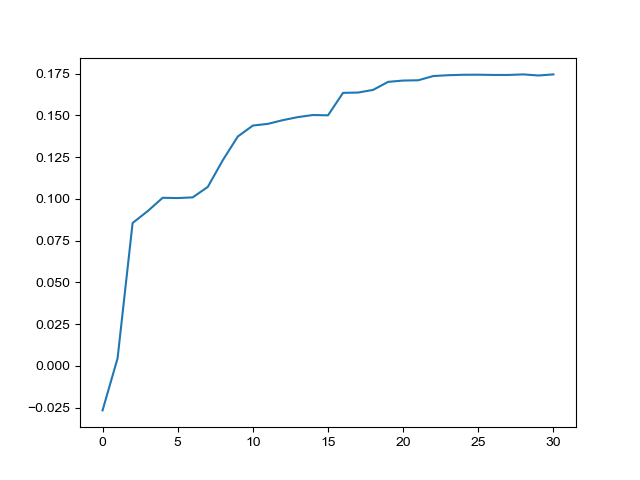

Optimal performance of  0.17451163090823785 , for  29  features
[ True  True  True  True  True  True  True  True False  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]


In [17]:
feat_select(X, y, linreg1)

As shown, the optimal performance occurs when we select the most significant 29 features, which means not using the features "RH4" and "RH5". Let's train the model without these 2 features:

In [40]:
def tune_selected_linReg_model(X, y):
    fs = SelectKBest(score_func=f_regression, k=31)
    X_selected = fs.fit_transform(X, y)
    linreg, y_pred = tune_linReg_model (X_selected, y)
    return linreg, y_pred

linreg2, y_pred2 = tune_selected_linReg_model(X, y)

Train accuracy:  0.18075339968829862
Average validation accuracy:  0.17451054162599952
Test accurancy:  0.16895438209774538


## 4. Evaluate results: analysis of performance and errors

### 4.1 Scores
While training the model, the following accurancy results were obtained: <br>
- training score: 0.18075
- validation score: 0.17451
- test score: 0.16895

These results show the model isn't performing well model once the score ir very low,
and that basically there is no overfitting, because the train score is almost the same of the validation score. <br>

### 4.2 Error analysis
To calculate the error of the model, we will use the MSE function, that calculates the error between the predictions and the true values :

In [41]:
def mse(p,y):
    err=0.5*np.dot(p-y,p-y)/len(y)
    return err

print("Linear regression model with default hyperparameters values:",mse(y_pred0,y_test))
print("Linear regression model with hyperparameters tuning:",mse(y_pred1,y_test))
print("Linear regression model with hyperparameters tuning and feature selection:",mse(y_pred2,y_test))

Linear regression model with default hyperparameters values: 4539.5626555448525
Linear regression model with hyperparameters tuning: 4535.962661105687
Linear regression model with hyperparameters tuning and feature selection: 4535.962661105687


### 4.3 Learning curves

<IPython.core.display.Javascript object>


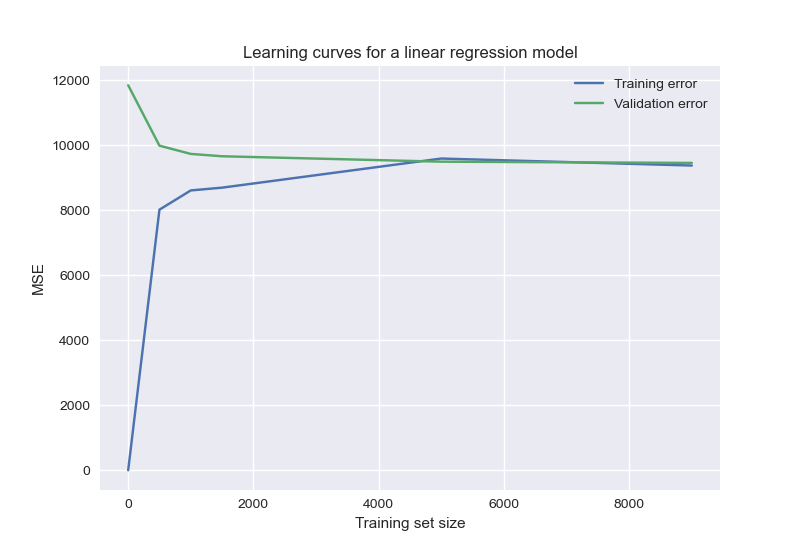

In [42]:
#Fig5: Learning curve for the linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

#training set sizes to use for generating the learning curves
train_sizes = [1, 500, 1000, 1500, 5000, 9000]

X_train, X_test, y_train, y_test =split_data_25 (X,y)

#generate the data needed to plot the learning curve
#for scoring,  the intention is to use the mean squared error (MSE) metric, 
#but that’s not a possible parameter for scoring;
#we’ll use the nearest proxy, negative MSE, and we’ll just have to flip signs later 
train_sizes, train_scores, validation_scores = learning_curve( estimator = LinearRegression(),
                                                                X = X_train,
                                                                y = y_train, 
                                                                train_sizes = train_sizes, cv = 5,
                                                                scoring = 'neg_mean_squared_error')

#take the the mean value of each row 
train_scores_mean = -train_scores.mean(axis = 1)
#flip the signs of the error scores
validation_scores_mean = -validation_scores.mean(axis = 1)

#plot the learning curves
import matplotlib.pyplot as plt
plt.figure()
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE')
plt.xlabel('Training set size')
plt.title('Learning curves for a linear regression model')
plt.legend()

### 4.4 Bias and Variance
As the learning curve shows, from around 6000 training data points, the validation MSE stays roughly the same and **both curves  converge**. So, adding more than 6000 instances won’t lead us to a better model.<br>
We also see that this is a **high bias** problem, because both training and validation error are very high, which means the model fails to fit the training data well.<br>
We can estimate the variance by examining the gap between the validation learning curve and training learning curve.
The gap becomes more and more narrow as the training size increases. We can conclude there is a **low variance** because of the narrow the gap.

### 4.5 Conclusion
The learning algorithm suffers from **high bias and low variance**, by underfitting the training data.
Adding more instances to the training data won't help us get a better model.

A solution could be increasing the model’s complexity by training the current model on more features (genereted by PolynomialFeatures).
 

## 5. Improving performance
Now, with the suggestion presented in the conclusion above, let's try to improve the performance of our model!

In [53]:
#Generate polynomial features
from sklearn.preprocessing import PolynomialFeatures
X_poly = PolynomialFeatures(2).fit_transform(X)
linreg3, y_pred3 = tune_linReg_model (X_poly, y) 

Train accuracy:  0.40923051044531145
Average validation accuracy:  0.3303119065753274
Test accurancy:  0.32749894615275976


A better perfomance was achieve!

## 6. Creating the Kaggle submission

In [62]:
#preparing the test data for the model 

df = pd.read_csv("./test.csv")

import datetime
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%Y-%m-%d %H:%M:%S')
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df['hour'] = pd.DatetimeIndex(df['date']).hour
df['minutes'] = pd.DatetimeIndex(df['date']).minute
df['weekday'] = pd.DatetimeIndex(df['date']).weekday

df.pop('date')
df.pop('rv2')
df.pop('RH_4')
df.pop('RH_5')
X_kaggle= df.values
X_kaggle = PolynomialFeatures(2).fit_transform(df.values)

In [ ]:
predictions = linreg3.predict(X_kaggle)
len(predictions)

#generate a unique file name
def generate_unique_filename(basename, file_ext):
    """Adds a timestamp to filenames for easier tracking of submissions, models, etc."""
    timestamp = time.strftime("%Y%m%d-%H%M%S", time.localtime())
    return basename + '_' + timestamp + '.' + file_ext

In [ ]:
#create padas dataframe
submission = pd.DataFrame(data=predictions, columns=["Appliances"])
submission.index.name = "Id"
submission.head()
submission.tail()

In [ ]:
submission.to_csv(generate_unique_filename("linReg10_submission", "csv"))